In [178]:
import pandas as pd
import numpy as np
# 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler ,MinMaxScaler
from imblearn.over_sampling import SMOTE



In [179]:
# managed PC 
PATH_TEST = r'E:\_Projects\_Under Construction Projects\Credit-score-classification\test.csv'
PATH_TRAIN=r'E:\_Projects\_Under Construction Projects\Credit-score-classification\train.csv'

In [180]:
df_train = pd.read_csv(PATH_TRAIN,encoding='utf-8',sep=',')
# df_test = pd.read_csv(PATH_TEST,encoding='utf-8',sep=',')

C:\Users\hp\AppData\Local\Temp\ipykernel_40580\2126733978.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(PATH_TRAIN,encoding='utf-8',sep=',')


In [181]:
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [182]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [183]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [184]:
df_train.describe(include='object').T


,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


<AxesSubplot: >

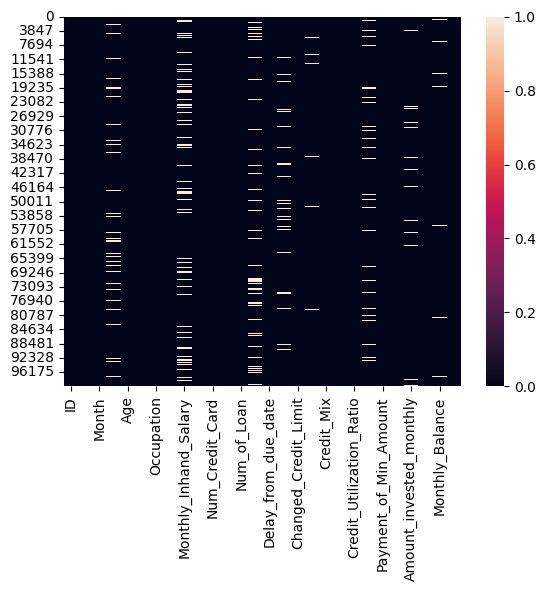

In [185]:
# sns.heatmap(df_train.isnull())

# reset nan

## Age column

In [186]:
df_train['Age']

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [187]:
# 000_ 
df_train['Age']= [s.replace('_', '') for s in df_train['Age']]
df_train['Age'] =df_train['Age'].astype(int)
# -500 
Customer_ID_age = df_train[df_train['Age'] < 0]['Customer_ID'].values
    # ----- method

# 



In [188]:
Customer_ID_age


array(['CUS_0xd40', 'CUS_0xff4', 'CUS_0x4080', 'CUS_0x9bc1', 'CUS_0x2827',
       'CUS_0x6794', 'CUS_0x71e0', 'CUS_0x3861', 'CUS_0x12d5',
       'CUS_0x6015', 'CUS_0xa9a6', 'CUS_0x3b88', 'CUS_0x682f',
       'CUS_0x31d5', 'CUS_0x8e75', 'CUS_0x3702', 'CUS_0x1d4e',
       'CUS_0x4ea5', 'CUS_0x8208', 'CUS_0x3ef5', 'CUS_0x76cf',
       'CUS_0x51b4', 'CUS_0x8b12', 'CUS_0xf23', 'CUS_0x7cfc', 'CUS_0xd83',
       'CUS_0x4223', 'CUS_0x86b', 'CUS_0x46eb', 'CUS_0x864a',
       'CUS_0x3b3f', 'CUS_0x62f0', 'CUS_0x9783', 'CUS_0x41e4',
       'CUS_0x93bb', 'CUS_0xc081', 'CUS_0xaf1b', 'CUS_0xc3d6',
       'CUS_0x58d0', 'CUS_0x2719', 'CUS_0xed3', 'CUS_0x5719',
       'CUS_0x8484', 'CUS_0xb68f', 'CUS_0x1739', 'CUS_0xb486',
       'CUS_0x33b4', 'CUS_0x8e53', 'CUS_0x406', 'CUS_0x864', 'CUS_0x7e8b',
       'CUS_0x7cd3', 'CUS_0x5840', 'CUS_0x2a03', 'CUS_0xc620',
       'CUS_0x22b3', 'CUS_0x5413', 'CUS_0xacd4', 'CUS_0x74d5',
       'CUS_0x59cf', 'CUS_0xb904', 'CUS_0x19cc', 'CUS_0x9894',
       'CUS_0xa2c0', 

In [189]:
indx_age = df_train[df_train['Age'] < 0].index
indx_age


Index([    2,   113,   289,   340,   560,   648,   702,   714,   765,   976,
       ...
       98499, 98702, 99073, 99124, 99129, 99531, 99541, 99762, 99937, 99963],
      dtype='int64', length=886)

In [190]:
# first methods 
df_train[df_train['Customer_ID'] == Customer_ID_age[0]] ['Age'].values.max()

23

In [191]:
#  second method
ids= df_train[df_train['Customer_ID'] == Customer_ID_age[0] ]['ID'].values

ages = df_train[df_train['Customer_ID'] == Customer_ID_age[0]]['Age'].values

print(ids)
print(ages)
indx = np.where(ages == -500)[0][0]
indx


['0x1602' '0x1603' '0x1604' '0x1605' '0x1606' '0x1607' '0x1608' '0x1609']
[  23   23 -500   23   23   23   23   23]


2

In [192]:
df_train[df_train['Customer_ID'] == Customer_ID_age[0]]['Age'].index

Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [193]:
df_train[df_train['ID'] == ids[indx-1]]["Age"] =5


C:\Users\hp\AppData\Local\Temp\ipykernel_40580\4263076513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[df_train['ID'] == ids[indx-1]]["Age"] =5


In [194]:
df_train[df_train['ID'] == ids[indx-1]]["Age"]


1    23
Name: Age, dtype: int32

In [202]:
df_train.loc[indx_age[0], 'Age']


-500

In [196]:
for C_id ,inx_age in zip(Customer_ID_age,indx_age) :
    ids=[]
    ages=[]
    indx=0
    
    ids = df_train[df_train['Customer_ID'] == C_id]['ID'].values

    # age
    # get indx of -500
    ages = df_train[df_train['Customer_ID'] == C_id]['Age'].values
    indx = np.where(ages == -500)[0][0]
    # reset 
    if indx > 0:
        df_train[df_train.loc[inx_age, 'Age']] = df_train[df_train['ID'] == ids[indx-1]]["Age"]
    else:
        df_train[df_train.loc[inx_age, 'Age']] = df_train[df_train['ID'] == ids[indx+1]]["Age"]





In [197]:
df_train[df_train['Age'] < 0].index


Index([    2,   113,   289,   340,   560,   648,   702,   714,   765,   976,
       ...
       98499, 98702, 99073, 99124, 99129, 99531, 99541, 99762, 99937, 99963],
      dtype='int64', length=886)

In [198]:
df_train[df_train['Age'] < 0]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,-500
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,NaN
113,0x16ab,CUS_0xff4,February,NaN,-500,655-05-7666,Entrepreneur,25546.26,NaN,8,...,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard,NaN
289,0x17b3,CUS_0x4080,February,ra Alperx,-500,995-37-8920,Mechanic,29469.98,2227.831667,7,...,3421.66,30.268411,13 Years and 3 Months,NM,69.685459,125.49176826031132,High_spent_Small_value_payments,287.6059398340756,Standard,NaN
340,0x17fe,CUS_0x9bc1,May,Jaisinghanij,-500,445-18-4420,Architect,20574.47,1740.539167,6,...,749.95,29.036164,11 Years and 3 Months,Yes,49.348666,139.97856227172545,Low_spent_Large_value_payments,254.72668807344257,Standard,NaN
560,0x194a,CUS_0x2827,January,Lisah,-500,486-07-1289,Scientist,144546.72,11809.560000,0,...,1045.11,40.840687,22 Years and 11 Months,No,136.988557,573.4115904774258,High_spent_Small_value_payments,730.5558529037837,Standard,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99531,0x25d31,CUS_0x85dd,April,Lucianam,-500,767-36-7303,Lawyer,8974.555,NaN,10,...,1660.14,22.173985,16 Years and 6 Months,Yes,30.443262,27.83822717284169,Low_spent_Medium_value_payments,300.106469,Poor,NaN
99541,0x25d3f,CUS_0xc22f,June,McMillanw,-500,795-34-9348,Scientist,34671.15,2637.262500,4,...,1071.97,25.076571,21 Years and 8 Months,Yes,52.337589,104.78314244377886,High_spent_Small_value_payments,366.605518,Standard,NaN
99762,0x25e8c,CUS_0x1b07,March,Baldwinq,-500,739-15-8297,Accountant,17818.6,1659.883333,4,...,301.52,26.398987,18 Years and 5 Months,NM,11.581102,34.98032691383901,High_spent_Medium_value_payments,369.426905,Standard,NaN
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,-500,226-45-0652,_______,22620.79,1722.065833,7,...,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard,NaN


## SSN

In [ ]:
df_train['SSN']=df_train['SSN'].astype(object)
df_train['SSN'] = [i.replace('#F%$D@*&8','nan') for i in df_train['SSN']]


AttributeError: 'str' object has no attribute 'fillna'

In [ ]:
missing_list =['#F%$D@*&8']
missing_list ={ 
                'SSN' :'#F%$D@*&8',
                'Occupation': '_______',
                }


In [ ]:
# ///////////////
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df_train['Customer_ID'].value_counts()

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64

In [ ]:
df_train[ df_train['Customer_ID']=='CUS_0x9d89'].T

,33360,33361,33362,33363,33364,33365,33366,33367
ID,0xd97a,0xd97b,0xd97c,0xd97d,0xd97e,0xd97f,0xd980,0xd981
Customer_ID,CUS_0x9d89,CUS_0x9d89,CUS_0x9d89,CUS_0x9d89,CUS_0x9d89,CUS_0x9d89,CUS_0x9d89,CUS_0x9d89
Month,January,February,March,April,May,June,July,August
Name,da Costan,da Costan,da Costan,da Costan,da Costan,da Costan,da Costan,da Costan
Age,27,27_,27,-500,28,28,28,28
SSN,576-38-5212,576-38-5212,576-38-5212,576-38-5212,576-38-5212,576-38-5212,576-38-5212,576-38-5212
Occupation,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur
Annual_Income,18413.795_,18413.795,18413.795,18413.795,18413.795,18413.795,18413.795,18413.795
Monthly_Inhand_Salary,1524.482917,1524.482917,1524.482917,1524.482917,1524.482917,1524.482917,1524.482917,1524.482917
Num_Bank_Accounts,5,5,5,5,5,5,5,5


In [ ]:
Customer_ID_list= df_train['Customer_ID'].drop_duplicates().values
len(Customer_ID_list)


12500

In [ ]:
# convert monthly balance to float

df_train["Monthly_Balance"].describe()

count                                98800
unique                               98792
top       __-333333333333333333333333333__
freq                                     9
Name: Monthly_Balance, dtype: object

In [ ]:
# convert monthly balance to float

df_train["Monthly_Balance"]=df_train["Monthly_Balance"].astype(float)

ValueError: could not convert string to float: '__-333333333333333333333333333__'